In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest

In [2]:
# Datos de pasajeros del TITANIC en Kaggle: https://www.kaggle.com/c/titanic

In [4]:
# Importando los datos
df=pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df[df['Survived']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### ¿Es la tarifa (Fare) distinta entre los que sobreviven y los que no sobreviven a la tragedia?

In [8]:
# Eliminamos los NaNs
x1=df[df['Survived']==1]['Fare'].dropna().to_numpy()
x2=df[df['Survived']==0]['Fare'].dropna().to_numpy()

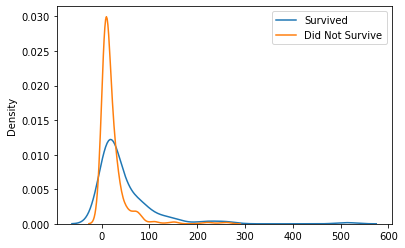

In [11]:
# Vamos a ver una imagen de los valores de las tarifas pagadas para los que sobreviven y los que no.
sns.kdeplot(x1, label='Survived')
sns.kdeplot(x2, label='Did Not Survive')
plt.legend();

In [12]:
# Medias muestrales de cada grupo:
x1.mean() , x2.mean()

(48.39540760233918, 22.117886885245902)

#### La información muestral sugiere que los que sobreviven en promedio pagan un poco más del doble del valor de la tarifa que han pagado los que no sobreviven. ¿Será una diferencia estadísticamente significativa?

In [13]:
# Contraste de comparación de dos muestras bilateral:
ztest(x1,x2)

(7.939191660871055, 2.035031103573989e-15)

#### El p-valor es muy pequeño: 2.035031103573989e-15 menor que el nivel de significación 0.05 que nos da un 95% de confianza, menor incluso que el del 1% (0.01) que nos da un 99% de coonfianza.

### Prueba Unilateral

In [16]:
# Prueba Unilateral a la derecha
ztest(x1,x2,alternative='larger') # En la H1: mu1 > mu2

(7.939191660871055, 1.0175155517869944e-15)